In [290]:
import matplotlib.pyplot as plt
import numpy as np

# Задание 1

## Исходные данные ##
$$f(z) = \tan{\frac{z}{4}}, \alpha = 1.6, \beta = 1/6, |z| \leq \alpha \lvert \cos(\beta \arg(z)) \rvert$$

In [299]:
theta = np.linspace(0, 6*np.pi, 1000)
r = 1.6 * np.abs(np.cos(theta/6))
x = r * np.cos(theta)
y = r * np.sin(theta)
z = x + 1j * y
f = np.tan(z/4)

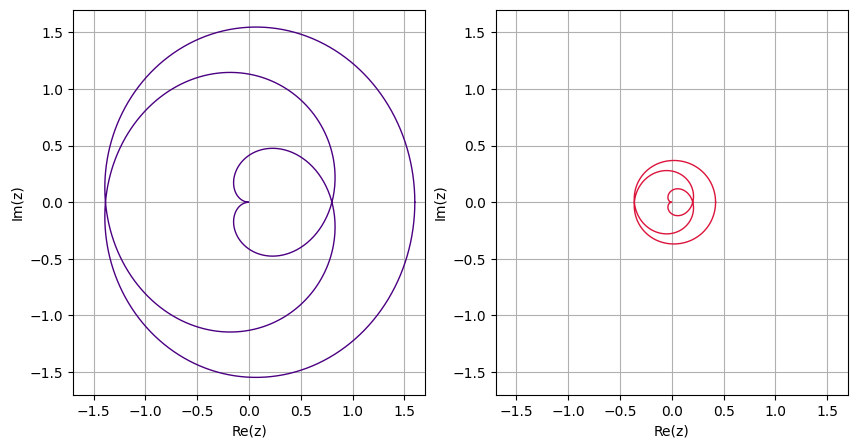

In [300]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(x, y, color='indigo', linewidth=1)
ax[0].set_xlim(-1.7, 1.7)
ax[0].set_ylim(-1.7, 1.7)
ax[0].set_xlabel('Re(z)')
ax[0].set_ylabel('Im(z)')
ax[0].grid()

ax[1].plot(f.real, f.imag, color='crimson', linewidth=1)
ax[1].set_xlim(-1.7, 1.7)
ax[1].set_ylim(-1.7, 1.7)
ax[1].set_xlabel('Re(z)')
ax[1].set_ylabel('Im(z)')
ax[1].grid()
plt.show()

In [301]:
theta = np.linspace(-np.pi, np.pi, 1000)
r = 1.6 * np.abs(np.cos(theta/6))
x = r * np.cos(theta)
y = r * np.sin(theta)
z = x + 1j * y
f = np.tan(z/4)

Ортогональная координатная сетка

In [302]:
rho = np.array([np.linspace(0, 1.6, 20)] * 100)
phi = np.array([np.linspace(0, 2*np.pi, 100)] * 20)

x_o = rho*(np.cos(phi).T)
y_o = rho*(np.sin(phi).T)

z_o = x_o + 1j * y_o
f_o = np.tan(z_o/4)

k = np.array([np.tan(np.linspace(0, np.pi, 32))] * 50)
u = np.linspace(-1.6, 1.6, 50)
v = k.T * u

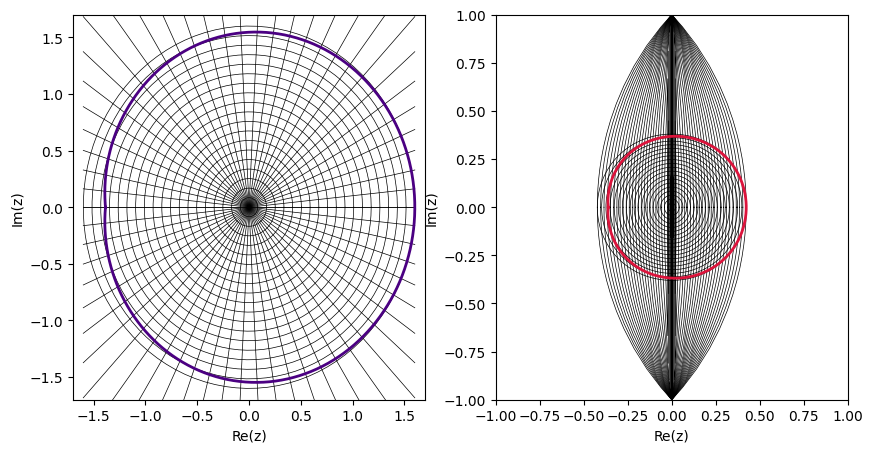

In [304]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(x_o, y_o, color ='black', linewidth=.5)
ax[0].plot(u, v.T, color ='black', linewidth=.5)
ax[0].plot(x, y, color='indigo', linewidth=2)
ax[0].set_xlim(-1.7, 1.7)
ax[0].set_ylim(-1.7, 1.7)
ax[0].set_xlabel('Re(z)')
ax[0].set_ylabel('Im(z)')

ax[1].plot(f_o.real, f_o.imag, color='black', linewidth=.5)
ax[1].plot(np.tan((u + 1j * v)/4).real, np.tan((u + 1j * v)/4).imag, color='black', linewidth=.5)
ax[1].plot(f.real, f.imag, color='crimson', linewidth=2)
ax[1].set_xlim(-1, 1)
ax[1].set_ylim(-1, 1)
ax[1].set_xlabel('Re(z)')
ax[1].set_ylabel('Im(z)')
plt.show()

# Задание 2

## Исходные данные
$$g(z) = \arcsin(z), \alpha_1 = 0.2, \beta_1 = \frac{2}{7}, \alpha_2 = 0.75, \beta_2 = \frac{3}{4}, \alpha_1 \lvert \cos(\beta_1 \arg(z)) \rvert \leq |z| \leq \alpha_2 \lvert \cos(\beta_2 \arg(z)) \rvert $$

In [272]:
theta = np.linspace(0, 28*np.pi, 1000)
r1 = 0.75 * np.abs(np.cos(3 * theta/4))
r2 = 0.2 * np.abs(np.cos(2 * theta/7))
x1, y1 = r1 * np.cos(theta), r1 * np.sin(theta)
x2, y2 = r2 * np.cos(theta), r2 * np.sin(theta)
z1 = x1 + 1j * y1
z2 = x2 + 1j * y2
def g(z): return np.arcsin(z)

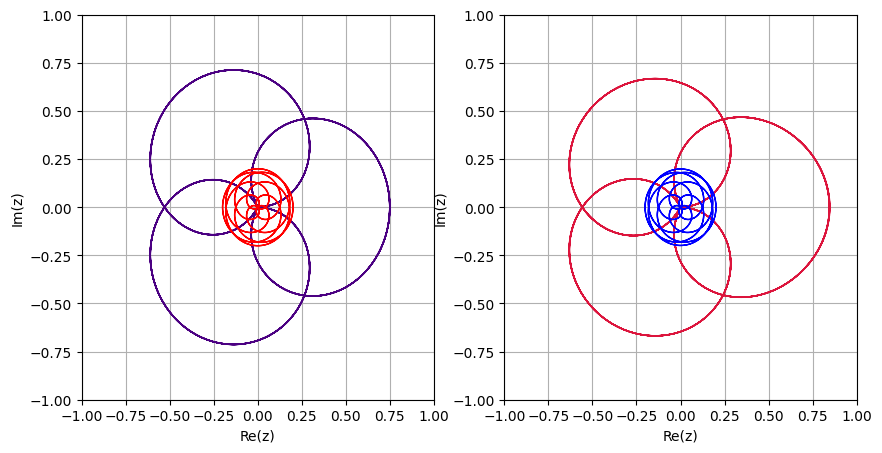

In [311]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(x1, y1, color='indigo', linewidth=1)
ax[0].plot(x2, y2, color='r', linewidth=1)
ax[0].set_xlim(-1, 1)
ax[0].set_ylim(-1, 1)
ax[0].set_xlabel('Re(z)')
ax[0].set_ylabel('Im(z)')
ax[0].grid()

ax[1].plot(g(z1).real, g(z1).imag, color='crimson', linewidth=1)
ax[1].plot(g(z2).real, g(z2).imag, color='b', linewidth=1)
ax[1].set_xlim(-1, 1)
ax[1].set_ylim(-1, 1)
ax[1].set_xlabel('Re(z)')
ax[1].set_ylabel('Im(z)')
ax[1].grid()
plt.show()

In [95]:
def hsl_coloring(z, a=1):
    h = np.angle(z) / (2 * np.pi) + 0.5  
    s = np.ones_like(z, dtype=float) 
    l = (np.abs(z)**a) / (np.abs(z)**a + 1)
    return np.dstack((h, s, l)).astype(float)

def to_rgb(hsl):
    h, s, l = hsl[..., 0], hsl[..., 1], hsl[..., 2]
    c = (1 - np.abs(2 * l - 1)) * s
    x = c * (1 - np.abs(np.mod(h * 6, 2) - 1))
    m = l - c / 2

    rgb = np.zeros(hsl.shape, dtype=float)

    h = h * 6
    i = (h < 1)
    rgb[i] = np.dstack((c[i], x[i], np.zeros_like(c[i]))) + m[i][..., np.newaxis]

    i = (1 <= h) & (h < 2)
    rgb[i] = np.dstack((x[i], c[i], np.zeros_like(c[i]))) + m[i][..., np.newaxis]

    i = (2 <= h) & (h < 3)
    rgb[i] = np.dstack((np.zeros_like(c[i]), c[i], x[i])) + m[i][..., np.newaxis]

    i = (3 <= h) & (h < 4)
    rgb[i] = np.dstack((np.zeros_like(c[i]), x[i], c[i])) + m[i][..., np.newaxis]

    i = (4 <= h) & (h < 5)
    rgb[i] = np.dstack((x[i], np.zeros_like(c[i]), c[i])) + m[i][..., np.newaxis]

    i = (5 <= h) & (h < 6)
    rgb[i] = np.dstack((c[i], np.zeros_like(c[i]), x[i])) + m[i][..., np.newaxis]

    return rgb

In [313]:
alpha1, beta1, alpha2, beta2 = 0.2, 2/7, 0.75, 3/4
x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

In [314]:
r = np.abs(Z)
arg = np.angle(Z)

In [315]:
r1_max = np.abs(np.cos(beta1 * (arg + 2 * np.pi * np.arange(-7, 8)[:, None, None]))).max(axis=0)
r2_max = np.abs(np.cos(beta2 * (arg + 2 * np.pi * np.arange(-7, 8)[:, None, None]))).max(axis=0)
mask = (alpha1 * r1_max <= r) & (r <= alpha2 * r2_max)

In [316]:
hsl = hsl_coloring(Z)
rgb = to_rgb(hsl)
rgb[~mask] = 1

In [317]:
W = np.sin(Z)

r_w = np.abs(W)
arg_w = np.angle(W)

r1_max_w = np.abs(np.cos(beta1 * (arg_w + 2 * np.pi * np.arange(-7, 8)[:, None, None]))).max(axis=0)
r2_max_w = np.abs(np.cos(beta2 * (arg_w + 2 * np.pi * np.arange(-7, 8)[:, None, None]))).max(axis=0)
mask_w = (alpha1 * r1_max_w <= r_w) & (r_w <= alpha2 * r2_max_w)

In [318]:
hsl_w = hsl_coloring(W)
rgb_w = to_rgb(hsl_w)
rgb_w[~mask_w] = 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


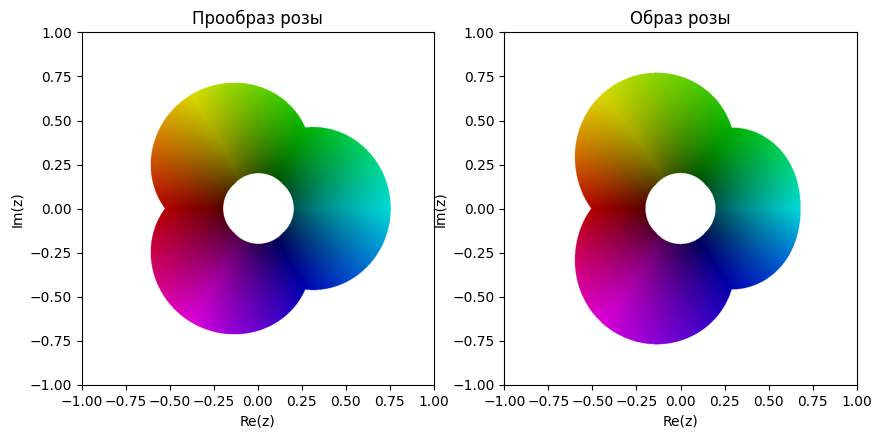

In [319]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(rgb, extent=[-1, 1, -1, 1])
ax[0].set_title('Прообраз розы')
ax[0].set_xlabel('Re(z)')
ax[0].set_ylabel('Im(z)')

ax[1].imshow(rgb_w, extent=[-1, 1, -1, 1])
ax[1].set_title('Образ розы')
ax[1].set_xlabel('Re(z)')
ax[1].set_ylabel('Im(z)')
plt.show()